In [14]:
import pandas as pd
from datetime import time
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import folium
from folium import plugins
from folium.plugins import HeatMap

In [15]:
df = pd.read_csv('traffic_accidents.csv', low_memory=False)

In [16]:
date_cols = [col for col in df.columns if 'Date' in col]
int_cols = [col for col in df.select_dtypes(include='int64').columns]
cat_cols = ['Offense_Code', 'Offense_Code_Extension', 'Top_Traffic_Accident_Offense', 'District_Id', 
            'Precinct_Id', 'Bicycle_Ind', 'Pedestrian_Ind', 'Harmful_Event_Seq_1', 'Harmful_Event_Seq_2', 
            'Harmful_Event_Seq_Most', 'Road_Location', 'Road_Description', 'Road_Contour', 'Road_Condition', 
            'Light_Condition', 'Tu1_Vehicle_Type', 'Tu1_Travel_Direction', 'Tu1_Vehicle_Movement', 
            'Tu1_Driver_Action', 'Tu1_Driver_Humancontribfactor', 'Tu1_Pedestrian_Action', 'Tu2_Vehicle_Type',
            'Tu2_Travel_Direction', 'Tu2_Vehicle_Movement', 'Tu2_Driver_Action',
            'Tu2_Driver_Humancontribfactor', 'Tu2_Pedestrian_Action', 'Seriously_Injured',  
            'Fatality_Mode_1', 'Fatality_Mode_2', 'Seriously_Injured_Mode_1', 'Seriously_Injured_Mode_2' ]

In [17]:
for col in date_cols:df[col] = pd.to_datetime(df[col], errors='coerce')

In [18]:
for col in int_cols:df[col] = df[col].astype("int32")

In [19]:
for col in cat_cols:df[col] = df[col].astype("category")

In [20]:
df['Fatalities'] = pd.to_numeric(df['Fatalities'], errors='coerce')

In [21]:
lat = df.Geo_Lat.mean()
lon =  df.Geo_Lon.mean()

In [29]:
denver_map = folium.Map(
    location=[lat, lon],
    tiles='Stamen Toner',  # Correctly formatted tile layer
    attr='Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL',
    zoom_start=11
)

In [31]:
heat_map = folium.FeatureGroup(name = 'heat_map')
heat_map.add_child( HeatMap( list(zip(df['Geo_Lat'].values, df['Geo_Lon'].values)), 
                   min_opacity=0.3,
                   radius=8.5, blur=7, 
                   max_zoom=1, 
                 ))

In [52]:
denver_map.add_child(heat_map)
denver_map

In [33]:
accident_prone = df.groupby(['Incident_Address', 'Geo_Lon', 'Geo_Lat']).size().reset_index(name='count').sort_values('count', ascending=False)

In [34]:
accident_and_death_prone= df.groupby(['Incident_Address', 'Geo_Lon', 'Geo_Lat']).agg({'Fatalities': 'sum', 'Incident_Address': 'count'})\
            .rename(columns={'Fatalities': 'Total_Fatalities', 'Incident_Address': 'Total_Accidents'})\
            .sort_values('Total_Accidents', ascending=False)

In [35]:
# add 0.1 to the 'Total_Fatalities' column
accident_and_death_prone['P&C loss index'] = (accident_and_death_prone['Total_Fatalities']+.1)*accident_and_death_prone['Total_Accidents']

# reorder the dataframe by the product of 'Total_Fatalities' and 'Total_Accidents'
accident_and_death_prone = accident_and_death_prone.sort_values('P&C loss index', ascending=False)
accident_and_death_prone.head(25)

Total_Fatalities  \
Incident_Address                   Geo_Lon     Geo_Lat                       
I70 Hwyeb / N Peoria St            -104.847037 39.774007               4.0   
I25 Hwynb / 20Th St                -105.004334 39.760949               4.0   
I70 Hwyeb / N Havana St            -104.865889 39.775633               3.0   
I25 Hwynb / W 6Th Ave              -105.013229 39.725677               1.0   
I25 Hwynb / E Hampden Ave          -104.918259 39.653079               2.0   
I25 Hwynb / I225 Hwynb             -104.906738 39.634141               3.0   
I70 Hwyeb / N Pecos St             -105.006426 39.783139               2.0   
I70 Hwyeb / I225 Hwysb             -104.833835 39.772868               4.0   
I70 Hwyeb / N Brighton Blvd        -104.967168 39.779882               2.0   
I25 Hwysb / 20Th St                -105.004766 39.761159               1.0   
I70 Hwyeb / I25 Hwysb              -104.989557 39.780108               2.0   
I25 Hwysb / W 8Th Ave              -105.015056 39.729322               2.0   
W 6Th Ave / I25 Hwynb              -105.013127 39.725536               2.0   
I25 Hwysb / W Alameda Ave          -104.999133 39.711205               1.0   
I70 Hwyeb / N Northfield Quebec St -104.903433 39.778300               2.0   
W Colfax Ave / I25 Hwynb           -105.013966 39.740435               3.0   
Pena Blvd                          -104.673812 39.849292               1.0   
I70 Hwywb / N Pecos St             -105.006428 39.783265               2.0   
I25 Hwynb / I70 Hwyeb              -104.989195 39.780043               1.0   
I70 Hwyeb / N Havana St            -104.865743 39.775622               1.0   
S Federal Blvd / W Mississippi Ave -105.025061 39.696746               2.0   
I25 Hwynb / W 8Th Ave              -105.014836 39.729321               1.0   
I25 Hwynb / Park Avew              -104.994971 39.768017               1.0   
20Th St / I25 Hwynb                -105.004334 39.760949               3.0   
I70 Hwywb / N Central Park Blvd    -104.882973 39.777289               1.0   

                                                          Total_Accidents  \
Incident_Address                   Geo_Lon     Geo_Lat                      
I70 Hwyeb / N Peoria St            -104.847037 39.774007              751   
I25 Hwynb / 20Th St                -105.004334 39.760949              634   
I70 Hwyeb / N Havana St            -104.865889 39.775633              469   
I25 Hwynb / W 6Th Ave              -105.013229 39.725677             1282   
I25 Hwynb / E Hampden Ave          -104.918259 39.653079              563   
I25 Hwynb / I225 Hwynb             -104.906738 39.634141              303   
I70 Hwyeb / N Pecos St             -105.006426 39.783139              407   
I70 Hwyeb / I225 Hwysb             -104.833835 39.772868              192   
I70 Hwyeb / N Brighton Blvd        -104.967168 39.779882              358   
I25 Hwysb / 20Th St                -105.004766 39.761159              666   
I70 Hwyeb / I25 Hwysb              -104.989557 39.780108              334   
I25 Hwysb / W 8Th Ave              -105.015056 39.729322              258   
W 6Th Ave / I25 Hwynb              -105.013127 39.725536              255   
I25 Hwysb / W Alameda Ave          -104.999133 39.711205              482   
I70 Hwyeb / N Northfield Quebec St -104.903433 39.778300              229   
W Colfax Ave / I25 Hwynb           -105.013966 39.740435              151   
Pena Blvd                          -104.673812 39.849292              401   
I70 Hwywb / N Pecos St             -105.006428 39.783265              199   
I25 Hwynb / I70 Hwyeb              -104.989195 39.780043              377   
I70 Hwyeb / N Havana St            -104.865743 39.775622              367   
S Federal Blvd / W Mississippi Ave -105.025061 39.696746              181   
I25 Hwynb / W 8Th Ave              -105.014836 39.729321              324   
I25 Hwynb / Park Avew              -104.994971 39.768017              322   
20Th St / I25 Hwynb       

In [36]:
count = round(100/len(set(df['Incident_Address'])), 4)
percent = round(accident_and_death_prone['Total_Accidents'].head(25).sum()*100/accident_and_death_prone['Total_Accidents'].sum(), 4)
print(f"The 25 locations where one is most likely to get into an accident account for {count} percent of the locations but {percent} percent to the accidents.")

The 25 locations where one is most likely to get into an accident account for 0.0056 percent of the locations but 4.5483 percent to the accidents.


In [37]:
accident_and_death_prone['Total_Accidents'].head(25).sum()/accident_and_death_prone['Total_Accidents'].sum()

0.045483276994531016

In [40]:
def lineplots (df, key='First_Occurrence_Date', freq='M',
               xtitle="Denver Accidents by Month", ytitle='# of Collisions'):
    fig, ax = plt.subplots(1,1)
    plt.style.use('fivethirtyeight')
    fig.set_size_inches(10, 4)
    ax.plot(df.groupby(pd.Grouper(key=key, freq=freq))
        .size(), '.', linestyle=(0, (1, 1)), color = 'blue', linewidth=1)
    ax.set_title(xtitle)
    ax.set_ylabel(ytitle)
    return ax

In [41]:
df.First_Occurrence_Date.max()

Timestamp('2023-04-26 20:11:00')

C:\Users\kushy\AppData\Local\Temp\ipykernel_7584\1662776944.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax.plot(df.groupby(pd.Grouper(key=key, freq=freq))


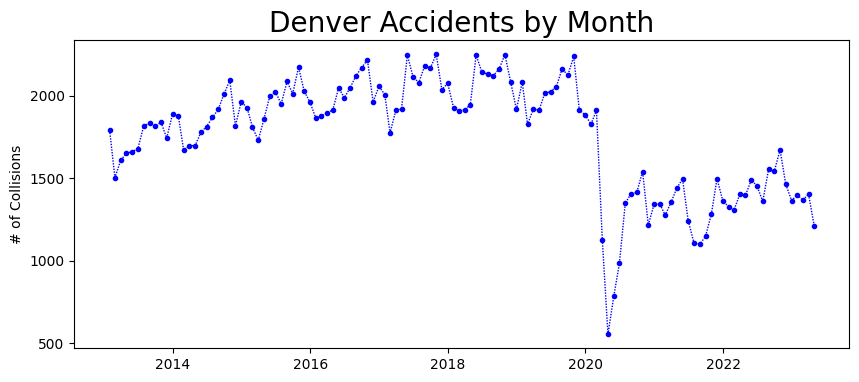

In [42]:
lineplots(df, key='First_Occurrence_Date', freq='M',xtitle="Denver Accidents by Month", ytitle='# of Collisions');

C:\Users\kushy\AppData\Local\Temp\ipykernel_7584\1662776944.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  ax.plot(df.groupby(pd.Grouper(key=key, freq=freq))


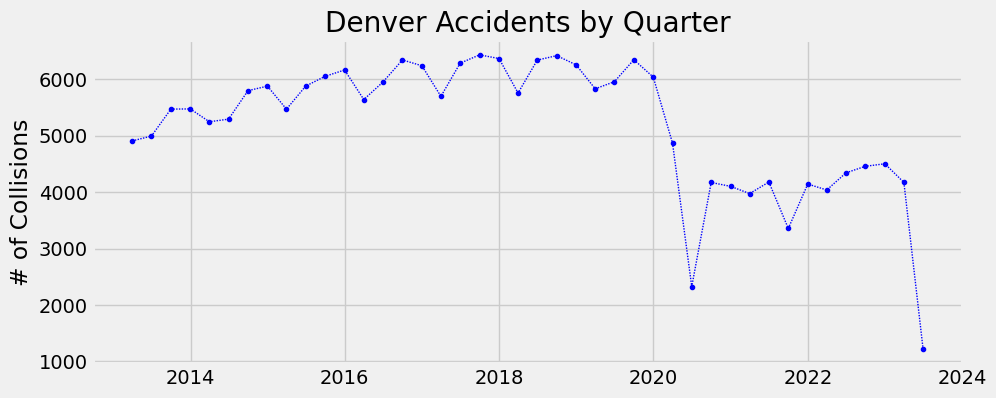

In [45]:
lineplots(df, key='First_Occurrence_Date', freq='Q',xtitle="Denver Accidents by Quarter", ytitle='# of Collisions');

C:\Users\kushy\AppData\Local\Temp\ipykernel_7584\1662776944.py:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ax.plot(df.groupby(pd.Grouper(key=key, freq=freq))


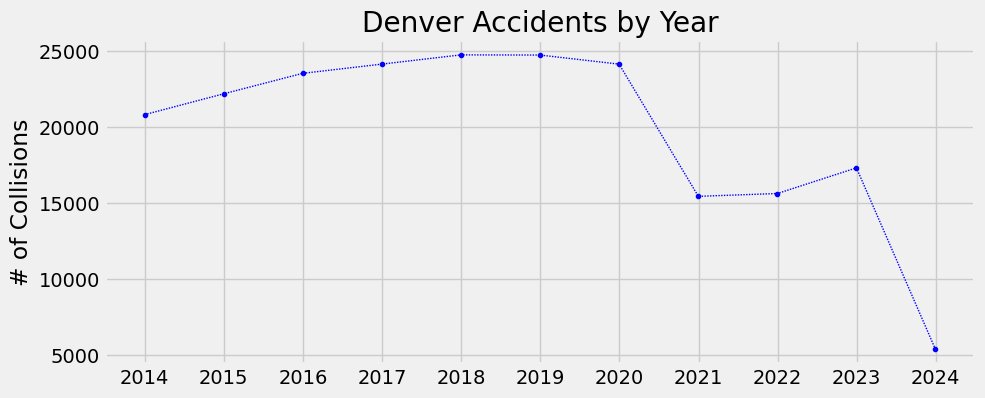

In [46]:
lineplots(df, key='First_Occurrence_Date', freq='Y',xtitle="Denver Accidents by Year", ytitle='# of Collisions');

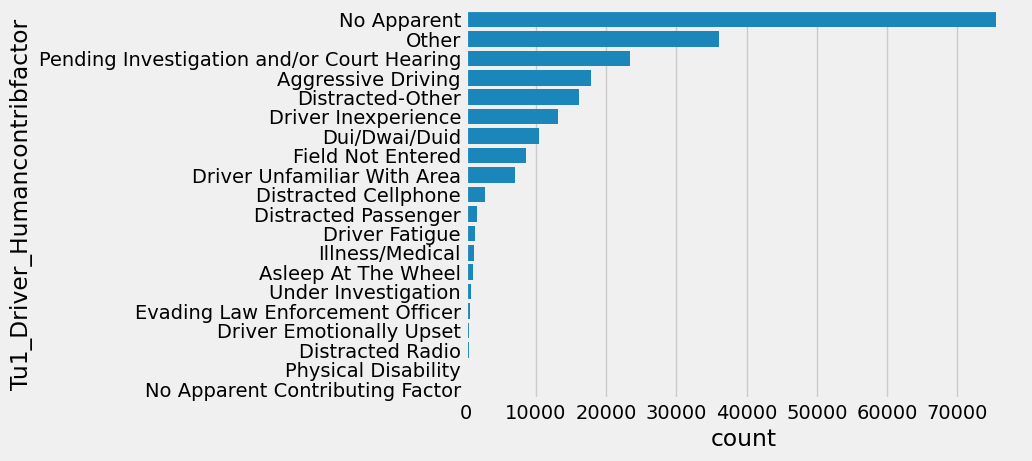

In [47]:
order = df["Tu1_Driver_Humancontribfactor"].value_counts().index.tolist()
sns.countplot(y=df["Tu1_Driver_Humancontribfactor"], order=order);

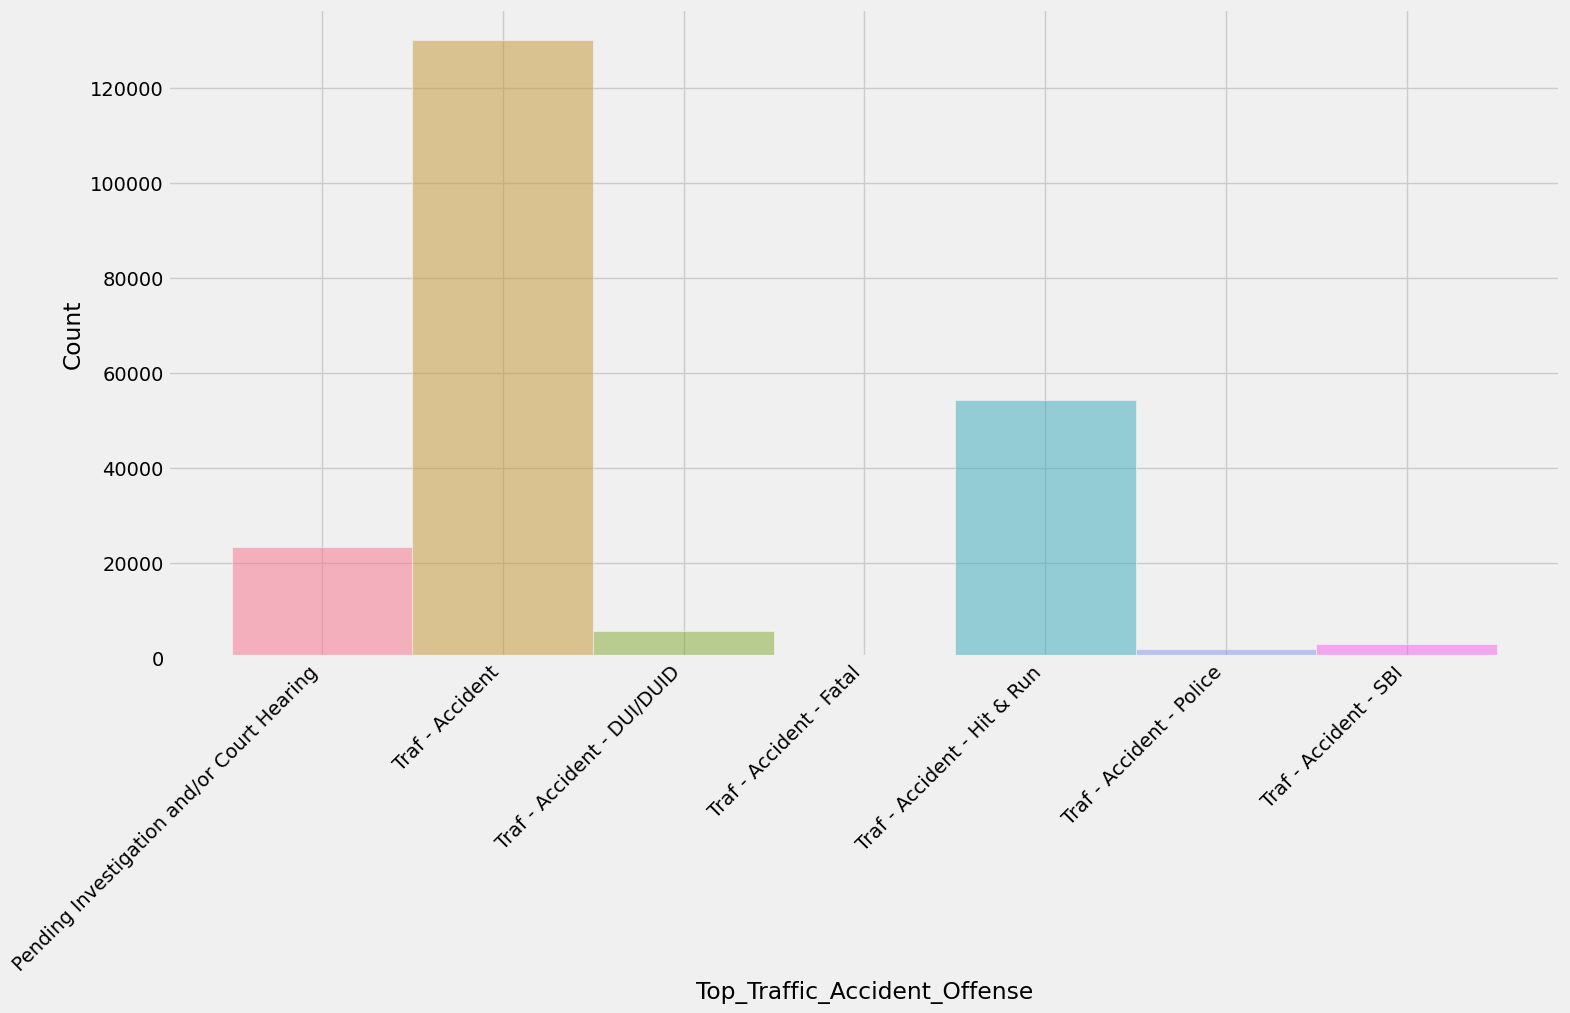

In [48]:
chart = plt.figure(figsize=(16,8))
sns.histplot(df, x="Top_Traffic_Accident_Offense", hue="Top_Traffic_Accident_Offense", legend=False)
plt.xticks(rotation=45, ha='right');

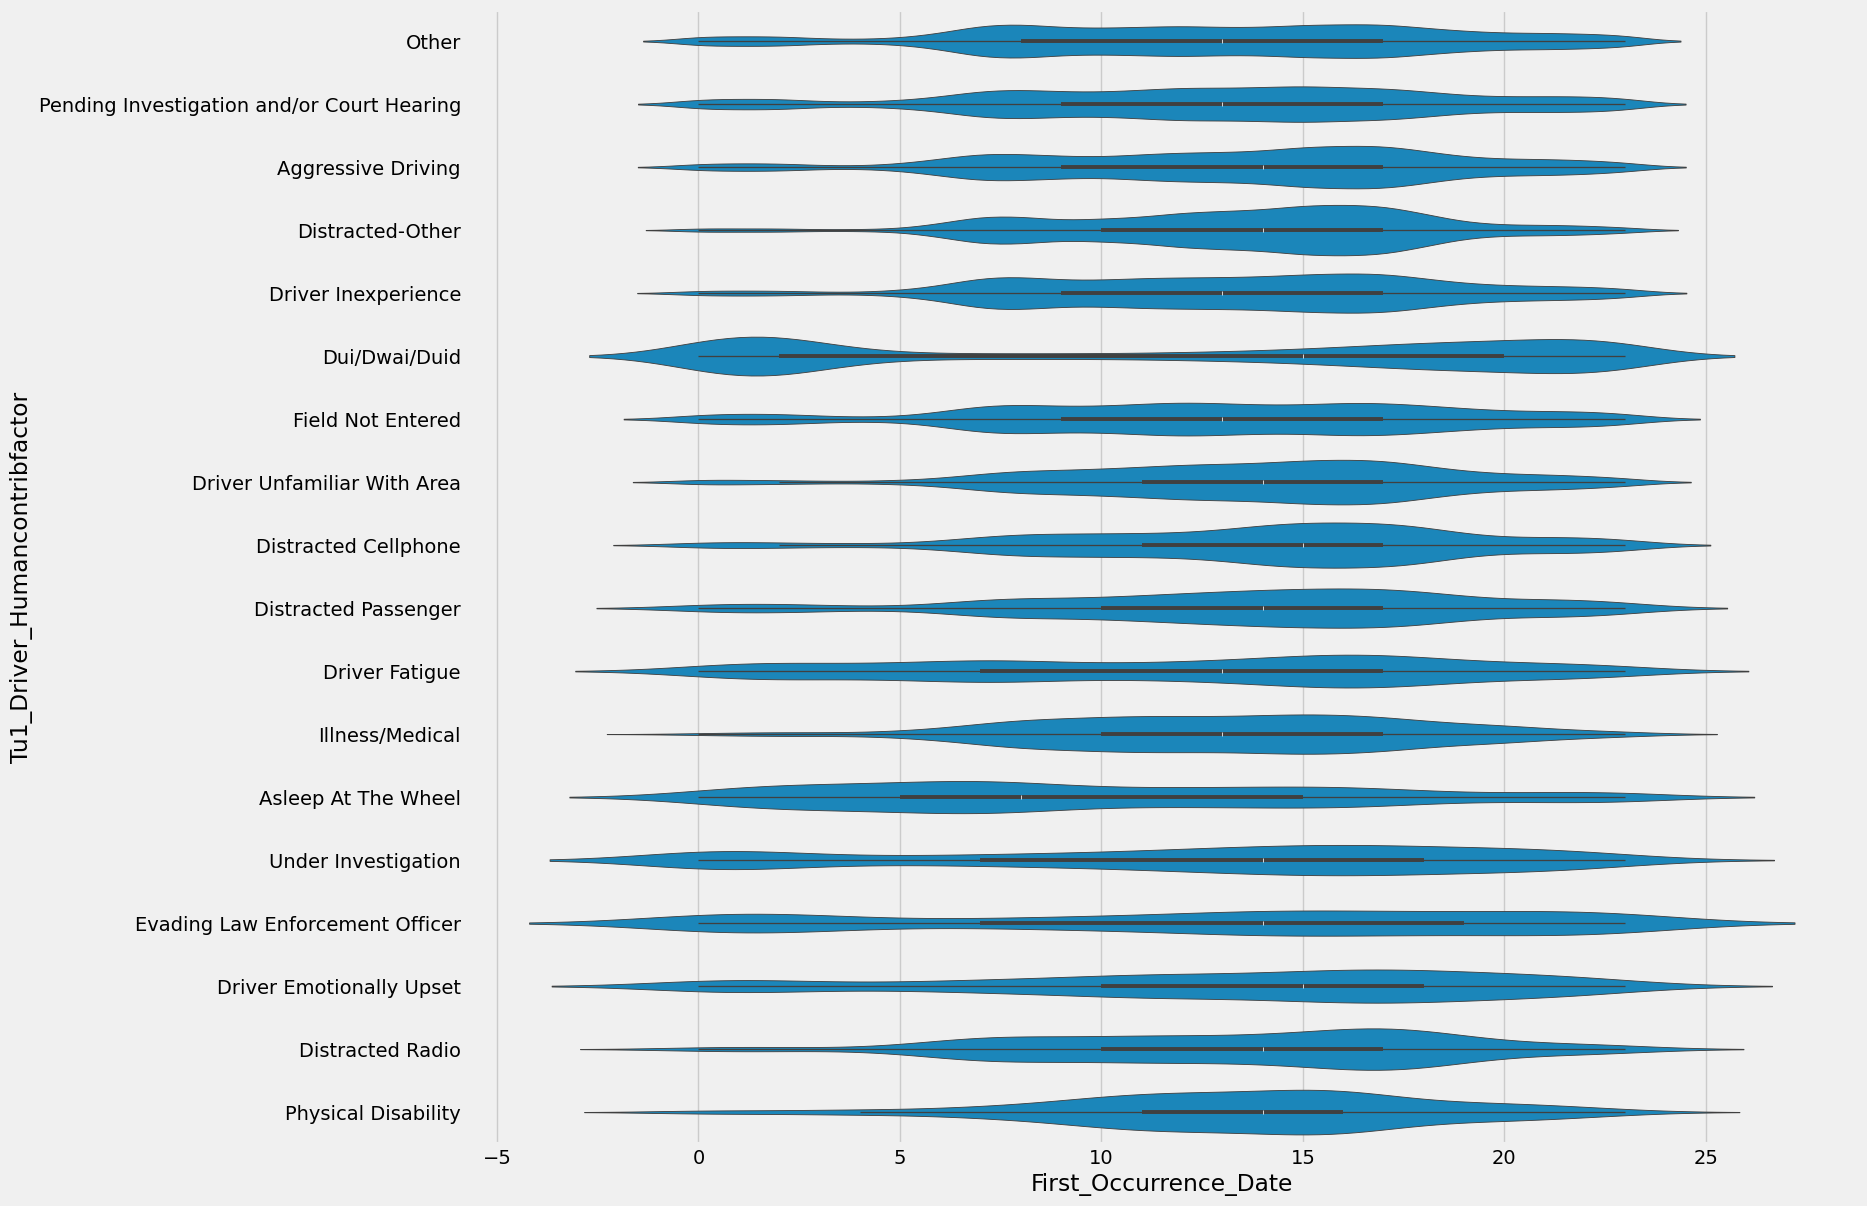

In [49]:
order = df["Tu1_Driver_Humancontribfactor"].value_counts().index.tolist()
relavent_order = order[1:-1]
chart = plt.figure(figsize=(16,14))
sns.violinplot(df, x=df['First_Occurrence_Date'].dt.hour, y=df["Tu1_Driver_Humancontribfactor"], order=relavent_order);

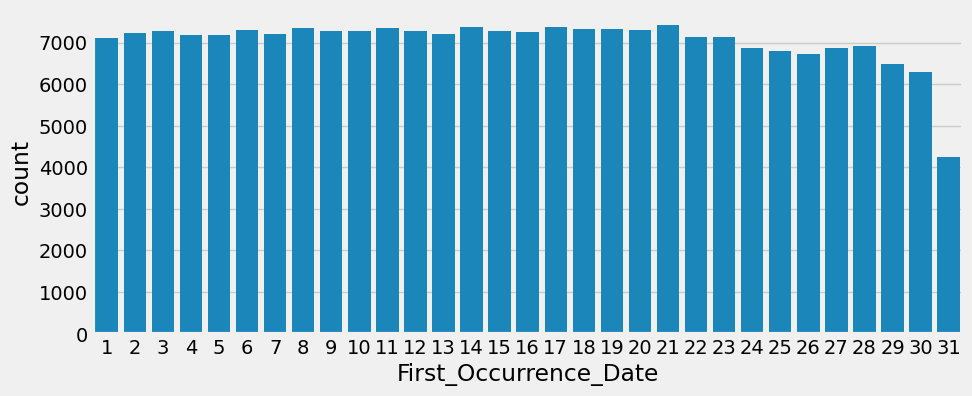

In [50]:
chart = plt.figure(figsize=(10,4))
sns.countplot(data=df, x=df['First_Occurrence_Date'].dt.day);

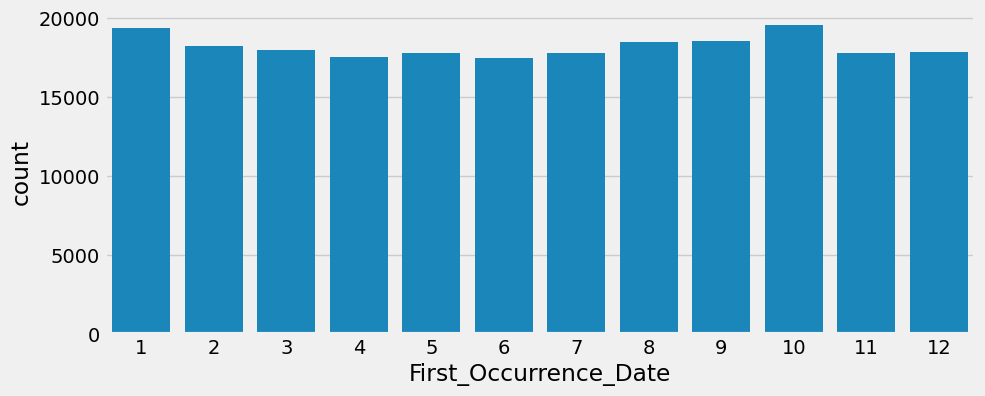

In [51]:
chart = plt.figure(figsize=(10,4))
sns.countplot(data=df, x=df['First_Occurrence_Date'].dt.month); 